# Initial analysis

In [475]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [476]:
# importing dataset
df = pd.read_csv("skills_data.csv")

In [477]:
df.head()

username   
0  %D0%BC%CE%B1%CE%B7%D7%A0%CF%85%CE%B7%CE%B1%D1%...  \
1  %E0%B2%A8%E0%B2%B5%E0%B3%80%E0%B2%A8%E0%B3%8D-...   
2  %E0%B2%AE%E0%B2%82%E0%B2%9C%E0%B3%81%E0%B2%A8%...   
3  %E2%97%8F%E0%B9%8B-%C2%A2%D0%BD%D1%94%D1%82%CE...   
4      %E2%98%80%EF%B8%8Frohit-kumar-sharma-a1672a94   

                                          job_titles   
0  [sr. sre,senior site reliability engineer,impl...  \
1  [management trainee human resources,technical ...   
2                              [deputy manager - hr]   
3      [sales manager,area manager,universal banker]   
4  [software development engineer ,intern,intern,...   

                                              skills  
0  [data center architecture,vendor management,wi...  
1  [human resources,technical recruiting,strategi...  
2  [human resources (hr),hr policies,human resour...  
3  [banking,loans,retail banking,sales operations...  
4  [mvc architecture,php,algorithms,software desi...

In [478]:
df.head(20)

username   
0   %D0%BC%CE%B1%CE%B7%D7%A0%CF%85%CE%B7%CE%B1%D1%...  \
1   %E0%B2%A8%E0%B2%B5%E0%B3%80%E0%B2%A8%E0%B3%8D-...   
2   %E0%B2%AE%E0%B2%82%E0%B2%9C%E0%B3%81%E0%B2%A8%...   
3   %E2%97%8F%E0%B9%8B-%C2%A2%D0%BD%D1%94%D1%82%CE...   
4       %E2%98%80%EF%B8%8Frohit-kumar-sharma-a1672a94   
5        %E2%98%85romi-bhattacharjee%E2%98%85-47b4204   
6                                         -aditya-roy   
7                                        -ashishsingh   
8                                              -ayush   
9                                        -dhruvkhanna   
10                                      -harshil-shah   
11                                         -mananjain   
12                                      -nidhi-tiwari   
13                                            -nitin-   
14                                       -sagar-kumar   
15                                        -sahil-garg   
16                                   -sudhanshusingh-   
17                                         -yashas-v-   
18                                    01rajatmalhotra   
19                                      0203rajatgoel   

                                           job_titles   
0   [sr. sre,senior site reliability engineer,impl...  \
1   [management trainee human resources,technical ...   
2                               [deputy manager - hr]   
3       [sales manager,area manager,universal banker]   
4   [software development engineer ,intern,intern,...   
5   [manager - hr & administration ,asstt. manager...   
6                 [devops ii,devops ,devops engineer]   
7   [research and strategy intern,sales and relati...   
8    [sde ii,systems engineer,principal, engineering]   
9   [assistant key account manager,assistant chef,...   
10  [product lead,senior product manager,industry ...   
11  [cxo - revenue & corp. dev.,director,digital g...   
12   [data analyst,freelance writer,analytics intern]   
13  [senior manager,engineering leader,founder,sen...   
14  [business development intern,subject matter ex...   
15  [deputy manager - product strategy and plannin...   
16  [digital marketing intern,business analyst - m...   
17                    [sales executive,sales analyst]   
18      [back-end developer,system software engineer]   
19  [market risk analyst,head of nucleus, phoenix ...   

                                               skills  
0   [data center architecture,vendor management,wi...  
1   [human resources,technical recruiting,strategi...  
2   [human resources (hr),hr policies,human resour...  
3   [banking,loans,retail banking,sales operations...  
4   [mvc architecture,php,algorithms,software desi...  
5   [human resources,vendor management,recruiting,...  
6   [continuous integration and continuous deliver...  
7   [negotiation,soft skills,blogging,sales & mark...  
8   [node.js,react.js,css,angularjs,mongodb,postgr...  
9   [microsoft excel,microsoft office,social media...  
10  [product management,analytics,start-ups,teamwo...  
11  [business management,business process improvem...  
12  [graphic design,machine learning,data visualiz...  
13  [technical project management,engineering mana...  
14  [engineering,industrial engineering,volunteeri...  
15  [microsoft office,microsoft excel,microsoft po...  
16  [google analytics,enterprise resource planning...  
17  [sales management,conferences,sales process,cu...  
18  [node.js,mongodb,amazon web services (aws),obj...  
19  [financial analysis,financial accounting,risk ...

In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   username    1000 non-null   object
 1   job_titles  1000 non-null   object
 2   skills      1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [480]:
# dropping the username column as it is not relevant to our eda

df=df.drop(['username'], axis=1)


In [481]:
# removing [] brackets fromt the columns
df["job_titles"] = df["job_titles"].apply(lambda x: x.replace("[",'').replace("]",''))


In [482]:
df["job_titles"]

0      sr. sre,senior site reliability engineer,imple...
1      management trainee human resources,technical r...
2                                    deputy manager - hr
3            sales manager,area manager,universal banker
4      software development engineer ,intern,intern,s...
                             ...                        
995    consultant|markting research,digital marketing...
996    user experience designer,user experience desig...
997                    programmer analyst trainee,intern
998    assistant manager training,head online trainin...
999    beauty creator ,insider,official campus ambass...
Name: job_titles, Length: 1000, dtype: object

In [483]:
df["skills"] = df["skills"].apply(lambda x: x.replace("[",'').replace("]",''))

In [484]:
df["skills"]

0      data center architecture,vendor management,win...
1      human resources,technical recruiting,strategic...
2      human resources (hr),hr policies,human resourc...
3      banking,loans,retail banking,sales operations,...
4      mvc architecture,php,algorithms,software desig...
                             ...                        
995    digital marketing,email marketing,search engin...
996    design ,user experience (ux),user interface de...
997    python (programming language),job control lang...
998    training delivery,coaching,content development...
999    powerpoint,blogging,data entry,english,faceboo...
Name: skills, Length: 1000, dtype: object

In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   job_titles  1000 non-null   object
 1   skills      1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


# First question 

In [486]:
# extracting all those records that are relevant to software developers/engineers
new_df= df['job_titles'].str.contains('software')

In [487]:
new_df.head()

0    False
1    False
2    False
3    False
4     True
Name: job_titles, dtype: bool

In [488]:
sdev_df = df[new_df]

In [489]:
sdev_df.head()

job_titles   
4   software development engineer ,intern,intern,s...  \
13  senior manager,engineering leader,founder,seni...   
18        back-end developer,system software engineer   
20  software development engineer i,jr mobile deve...   
21  engineer 2,software engineering trainee,sde ii...   

                                               skills  
4   mvc architecture,php,algorithms,software desig...  
13  technical project management,engineering manag...  
18  node.js,mongodb,amazon web services (aws),obje...  
20  spring boot,android development,mongodb,drools...  
21  c++,github,javascript,machine learning,shell s...

In [490]:
sdev_df.shape

(253, 2)

In [491]:
sdev_wc = WordCloud(width=800,height=500,background_color='black', min_font_size=5).generate(sdev_df['skills'].str.cat(sep=","))

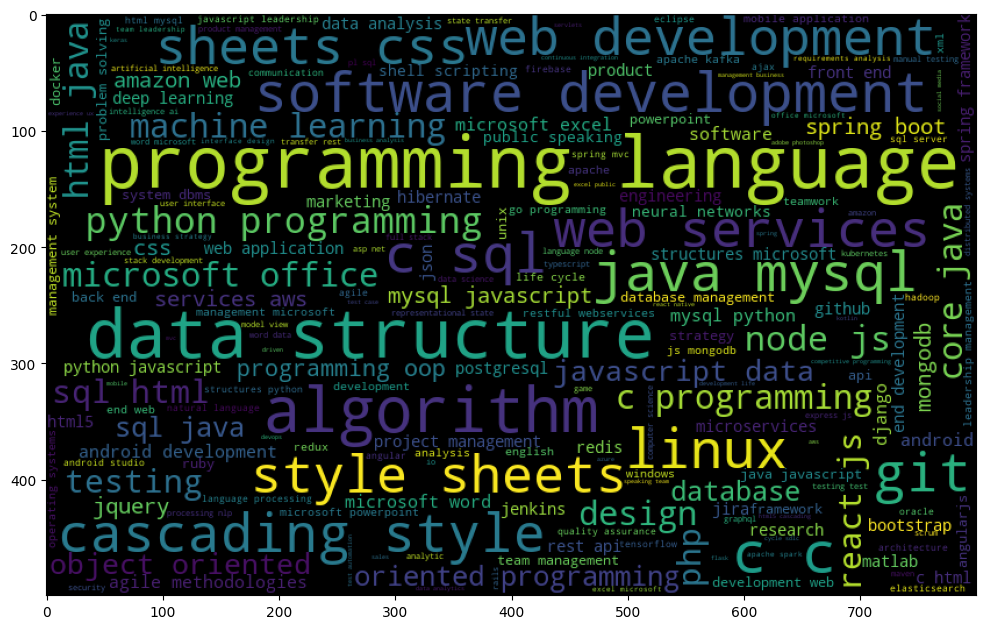

In [492]:
plt.figure(figsize=(12,8))
plt.imshow(sdev_wc)

In [493]:
sdev_skills = []
for msg in sdev_df['skills'].tolist():
    for word in msg.split(sep=','):
        sdev_skills.append(word)

In [494]:
from collections import Counter
skills_df=pd.DataFrame(Counter(sdev_skills).most_common(30))[0]
skills_df

0                                  java
1                                   c++
2                            javascript
3                                   sql
4                                 mysql
5                       data structures
6                                  html
7                                     c
8                            algorithms
9                                python
10                                linux
11         cascading style sheets (css)
12                          programming
13                                  git
14                 software development
15        python (programming language)
16                              node.js
17                            core java
18                     microsoft office
19                              mongodb
20                                  php
21             c (programming language)
22                      web development
23                             react.js
24                               jquery


In [495]:
scount = pd.DataFrame(Counter(sdev_skills).most_common(30))[1]
scount

0     150
1     138
2     130
3     123
4     115
5     110
6     103
7      99
8      80
9      73
10     70
11     68
12     68
13     67
14     67
15     59
16     58
17     55
18     54
19     53
20     50
21     49
22     49
23     49
24     48
25     47
26     45
27     41
28     37
29     35
Name: 1, dtype: int64

In [496]:
s_df = pd.concat([skills_df,scount], axis=1, join='inner')
s_df

0    1
0                                java  150
1                                 c++  138
2                          javascript  130
3                                 sql  123
4                               mysql  115
5                     data structures  110
6                                html  103
7                                   c   99
8                          algorithms   80
9                              python   73
10                              linux   70
11       cascading style sheets (css)   68
12                        programming   68
13                                git   67
14               software development   67
15      python (programming language)   59
16                            node.js   58
17                          core java   55
18                   microsoft office   54
19                            mongodb   53
20                                php   50
21           c (programming language)   49
22                    web development   49
23                           react.js   49
24                             jquery   48
25                   machine learning   47
26                         leadership   45
27  object-oriented programming (oop)   41
28                        spring boot   37
29          amazon web services (aws)   35

In [497]:
s_df.columns = ['skills','count']
s_df

skills  count
0                                java    150
1                                 c++    138
2                          javascript    130
3                                 sql    123
4                               mysql    115
5                     data structures    110
6                                html    103
7                                   c     99
8                          algorithms     80
9                              python     73
10                              linux     70
11       cascading style sheets (css)     68
12                        programming     68
13                                git     67
14               software development     67
15      python (programming language)     59
16                            node.js     58
17                          core java     55
18                   microsoft office     54
19                            mongodb     53
20                                php     50
21           c (programming language)     49
22                    web development     49
23                           react.js     49
24                             jquery     48
25                   machine learning     47
26                         leadership     45
27  object-oriented programming (oop)     41
28                        spring boot     37
29          amazon web services (aws)     35

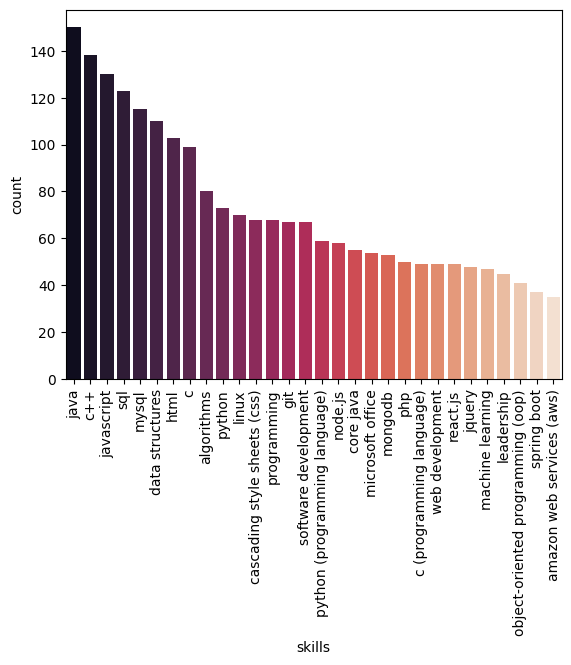

In [498]:
sns.barplot(x='skills',y='count', data= s_df, palette='rocket')
plt.xticks(rotation='vertical')
plt.show()

## The bar graphtells us that Java is the most popular skill among software developers/engineers.

### Plotting a pie chart to gain more insights

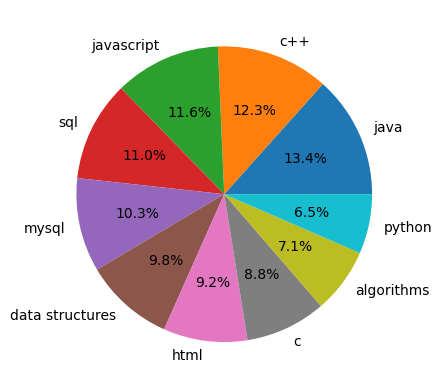

In [499]:
plt.pie(scount.head(10), labels=skills_df.head(10),autopct='%1.1f%%')
plt.show()

### Here we can see from the pie chart that Java is the most popular skill among software developers/engineers closely followed by C++ and then javascript.
1. Java = 13.4%
2. C++ = 12.3%
3. JavaScript = 11.6% 

# Second question

In [500]:
new_df= df['skills'].str.contains('python')

In [501]:
py_df = df[new_df]
py_df.head()

job_titles   
0   sr. sre,senior site reliability engineer,imple...  \
6                   devops ii,devops ,devops engineer   
12     data analyst,freelance writer,analytics intern   
13  senior manager,engineering leader,founder,seni...   
16  digital marketing intern,business analyst - mo...   

                                               skills  
0   data center architecture,vendor management,win...  
6   continuous integration and continuous delivery...  
12  graphic design,machine learning,data visualiza...  
13  technical project management,engineering manag...  
16  google analytics,enterprise resource planning ...

In [502]:
py_df.shape

(246, 2)

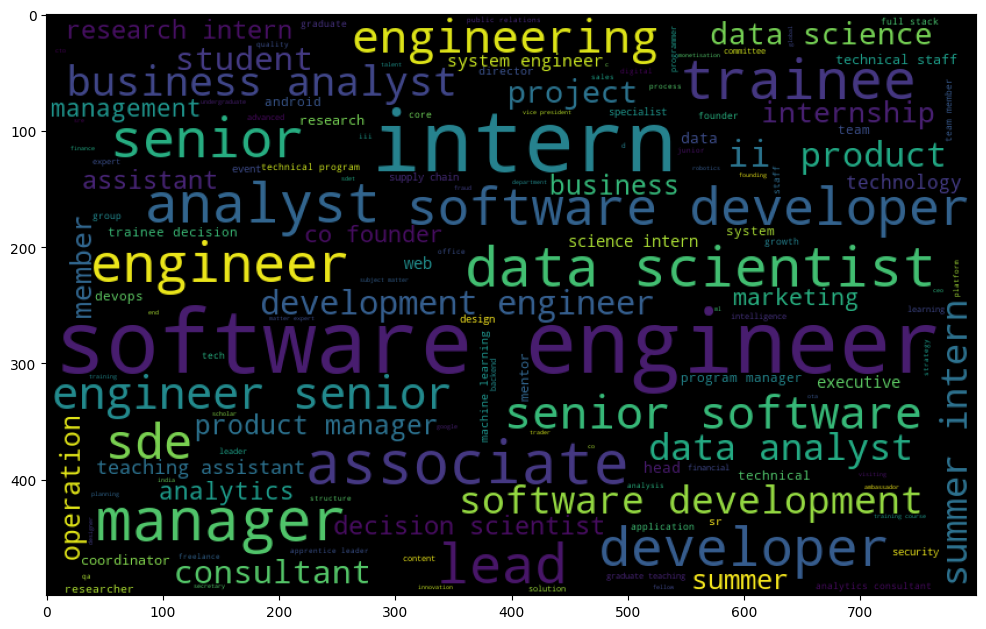

In [503]:
python_wc = WordCloud(width=800,height=500,background_color='black', min_font_size=5).generate(py_df['job_titles'].str.cat(sep=","))
plt.figure(figsize=(12,8))
plt.imshow(python_wc)

In [504]:
job_titles = []
for msg in py_df['job_titles'].tolist():
    for word in msg.split(sep=','):
        job_titles.append(word)

In [505]:
jobs=pd.DataFrame(Counter(job_titles).most_common(30))[0]
jobs

0                 software engineer
1                            intern
2          senior software engineer
3                     summer intern
4                software developer
5                    data scientist
6                      data analyst
7                  business analyst
8          software engineer intern
9               data science intern
10            senior data scientist
11        software developer intern
12                          trainee
13                       co-founder
14                          analyst
15                  research intern
16                         engineer
17                              sde
18               decision scientist
19      associate software engineer
20       trainee decision scientist
21        member of technical staff
22          senior business analyst
23    software development engineer
24                  system engineer
25           summer research intern
26                        associate
27                       int

In [506]:
count=pd.DataFrame(Counter(job_titles).most_common(30))[1]
count

0     84
1     44
2     32
3     26
4     26
5     24
6     21
7     16
8     13
9     12
10    12
11    12
12    12
13    11
14    10
15     9
16     9
17     9
18     9
19     8
20     8
21     7
22     7
23     7
24     6
25     6
26     6
27     6
28     6
29     6
Name: 1, dtype: int64

In [507]:
job_df = pd.concat([jobs,count], axis=1, join='inner')
job_df.columns = ['jobs','count']
job_df

jobs  count
0               software engineer     84
1                          intern     44
2        senior software engineer     32
3                   summer intern     26
4              software developer     26
5                  data scientist     24
6                    data analyst     21
7                business analyst     16
8        software engineer intern     13
9             data science intern     12
10          senior data scientist     12
11      software developer intern     12
12                        trainee     12
13                     co-founder     11
14                        analyst     10
15                research intern      9
16                       engineer      9
17                            sde      9
18             decision scientist      9
19    associate software engineer      8
20     trainee decision scientist      8
21      member of technical staff      7
22        senior business analyst      7
23  software development engineer      7
24                system engineer      6
25         summer research intern      6
26                      associate      6
27                     internship      6
28                product analyst      6
29                     sde intern      6

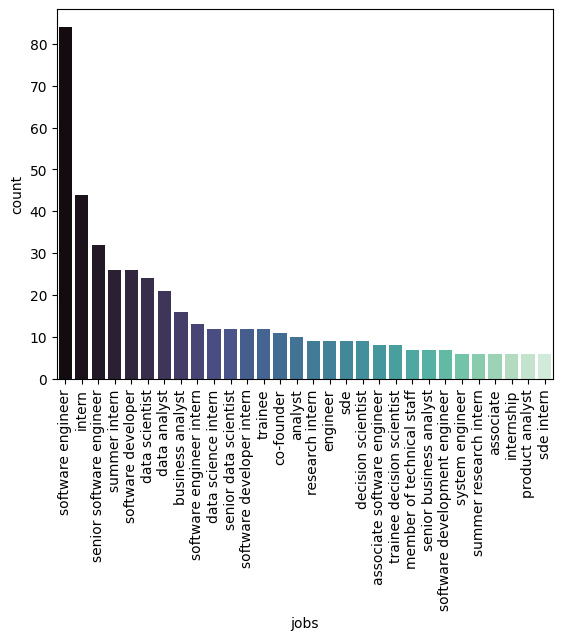

In [508]:
sns.barplot(x='jobs',y='count', data= job_df, palette='mako')
plt.xticks(rotation='vertical')
plt.show()

### From the bar graph we can canclude that the job title "Software Engineer" requires Python as the highly sought after skill

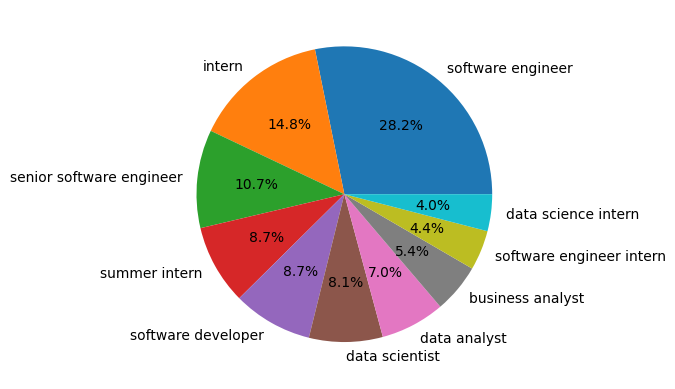

In [509]:
plt.pie(count.head(10), labels=jobs.head(10),autopct='%1.1f%%')
plt.show()

### From the pie chart we can conclude that major tech related job titles require python as a highly sought after skill as python is a very popular language in the tech world and even in the fields of analysis.

# Third Question

In [510]:
react_df=df[df['skills'].str.contains('react.js')]
react_df.shape

(58, 2)

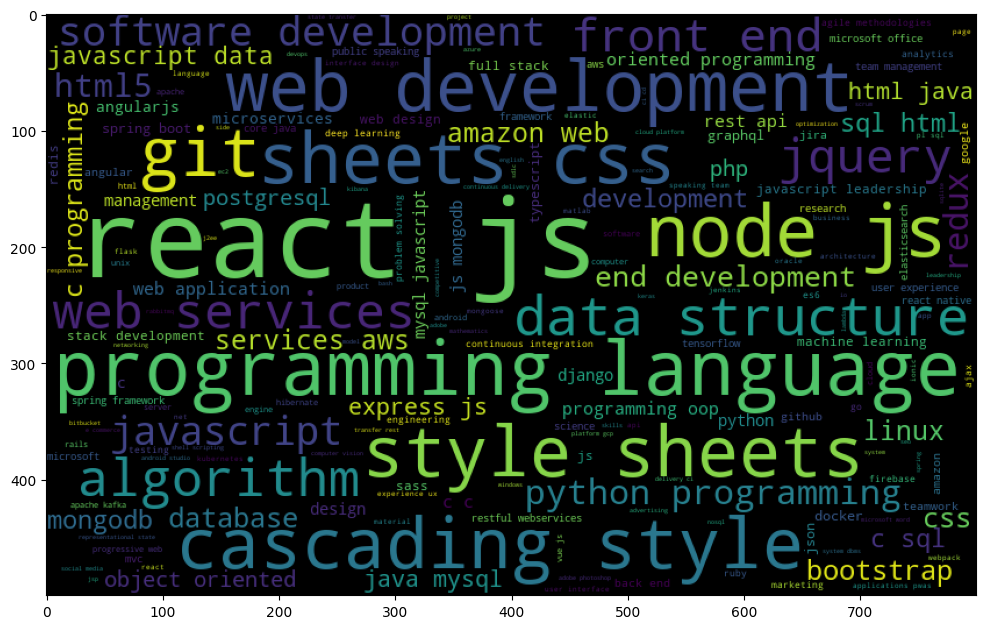

In [511]:
react_wc = WordCloud(width=800,height=500,background_color='black', min_font_size=5).generate(react_df['skills'].str.cat(sep=","))
plt.figure(figsize=(12,8))
plt.imshow(react_wc)

In [512]:
react = []
for msg in react_df['skills'].tolist():
    for word in msg.split(sep=','):
        react.append(word)


In [513]:
df1 = pd.DataFrame(Counter(react).most_common(30))[0]
df1=df1.drop(0)

In [514]:
df2 = pd.DataFrame(Counter(react).most_common(30))[1]
df2=df2.drop(0)

In [515]:
sdf = pd.concat([df1,df2], axis=1, join='inner')
sdf.columns = ['skills','count']
sdf

skills  count
1                          javascript     52
2                             node.js     35
3                                html     33
4        cascading style sheets (css)     33
5                                 c++     30
6                                 git     29
7                               mysql     28
8                     data structures     28
9                             mongodb     27
10                               java     26
11                                sql     25
12                    web development     25
13                         algorithms     23
14                             jquery     21
15      python (programming language)     20
16               software development     19
17              front-end development     18
18                              html5     18
19                                  c     17
20                          bootstrap     17
21          amazon web services (aws)     16
22                              linux     16
23                         express.js     14
24           c (programming language)     14
25                         postgresql     13
26  object-oriented programming (oop)     13
27                                php     13
28                             python     12
29                          angularjs     11

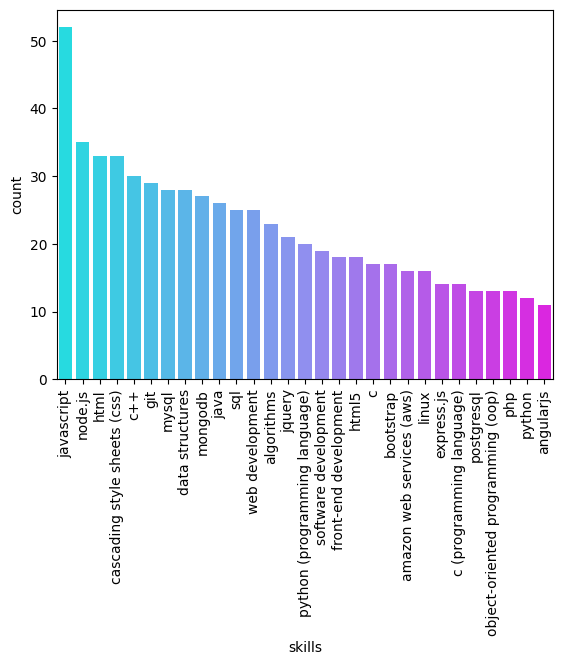

In [516]:
sns.barplot(x='skills',y='count', data= sdf, palette='cool')
plt.xticks(rotation='vertical')
plt.show()

### The bar graph tells us that "javascript" is the most popular skill among the professionals who know "react.js"

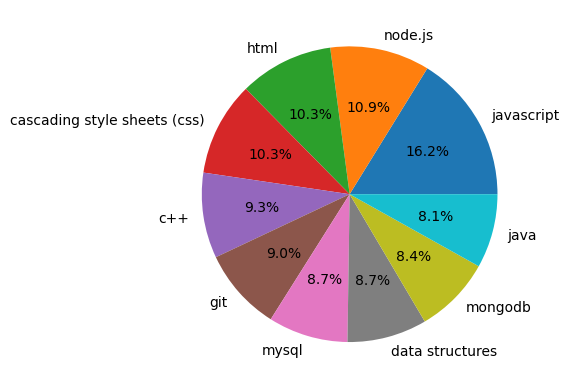

In [517]:
plt.pie(df2.head(10), labels=df1.head(10),autopct='%1.1f%%')
plt.show()

### The pie chart tells about the most popular skills for a professional who knows "react.js" are javascript,html,css,c++,git,mongodb,node.js. 
Out of these skills, the most popular ones are:
1. javascript = 14.0%
2. html = 11.3%
3. css = 10.6%

# Fourth question

## Trying to determine the different job roles present in the dataset and their weightage

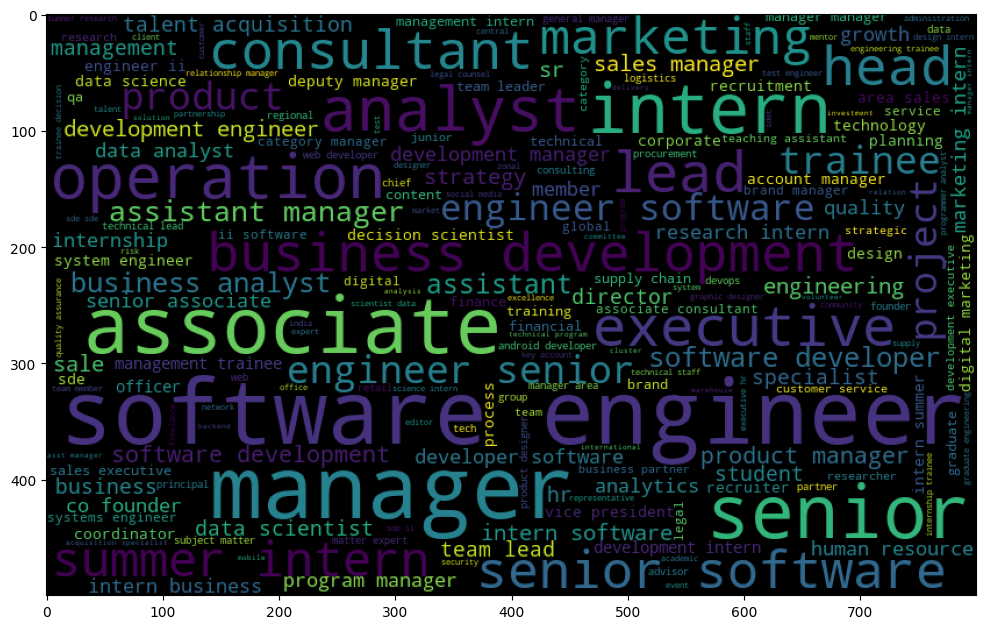

In [518]:
main_wc = WordCloud(width=800,height=500,background_color='black', min_font_size=5).generate(df['job_titles'].str.cat(sep=","))
plt.figure(figsize=(12,8))
plt.imshow(main_wc)

In [519]:
main_corpus = []
for msg in df['job_titles'].tolist():
    for word in msg.split(sep=','):
        main_corpus.append(word)


In [520]:
df1 = pd.DataFrame(Counter(main_corpus).most_common(30))[0]

In [521]:
df2 = pd.DataFrame(Counter(main_corpus).most_common(30))[1]

In [522]:
j_df = pd.concat([df1,df2], axis=1, join='inner')
j_df.columns = ['job_titles','count']

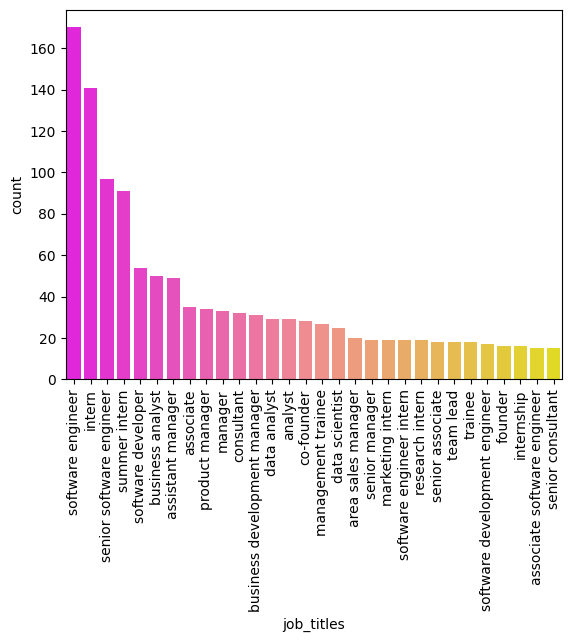

In [523]:
sns.barplot(x='job_titles',y='count', data= j_df, palette='spring')
plt.xticks(rotation='vertical')
plt.show()

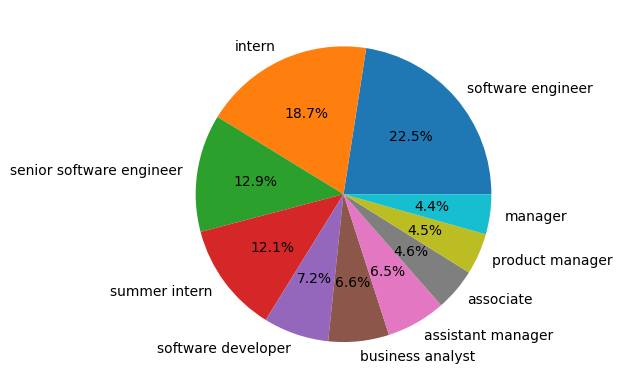

In [524]:
plt.pie(df2.head(10), labels=df1.head(10),autopct='%1.1f%%')
plt.show()

### From the above analysis and plots, we can conclude that job titles related to IT sector are most abundant followed by manager job titles.

### The pie chart gives us valuable insights like : 

The majority of job titles in the dataset are "Software Engineer" which comprise 22.5% of the dataset. 

The dataset then majorly contains records of intern and software developer/engineer related job titles.

After that come job titles related to business and management like business analyst, assistant manager, etc. 

## Now looking into the trends in skills

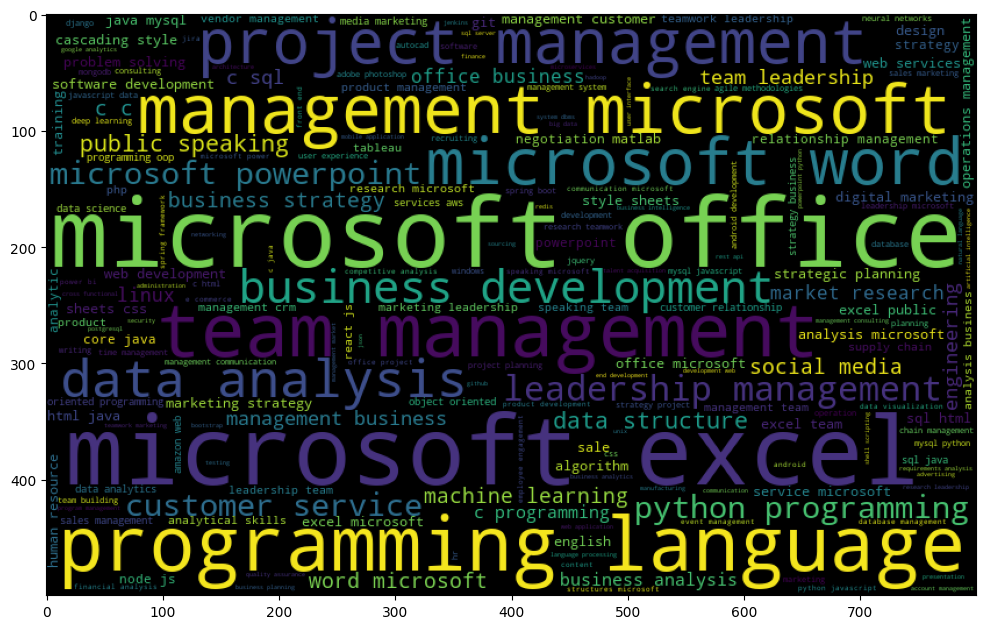

In [525]:
mainskill_wc = WordCloud(width=800,height=500,background_color='black', min_font_size=5).generate(df['skills'].str.cat(sep=","))
plt.figure(figsize=(12,8))
plt.imshow(mainskill_wc)

In [526]:
main_corpus = []
for msg in df['skills'].tolist():
    for word in msg.split(sep=','):
        main_corpus.append(word)


In [527]:
df1 = pd.DataFrame(Counter(main_corpus).most_common(30))[0]

In [528]:
df2 = pd.DataFrame(Counter(main_corpus).most_common(30))[1]

In [529]:
j_df = pd.concat([df1,df2], axis=1, join='inner')
j_df.columns = ['skills','count']

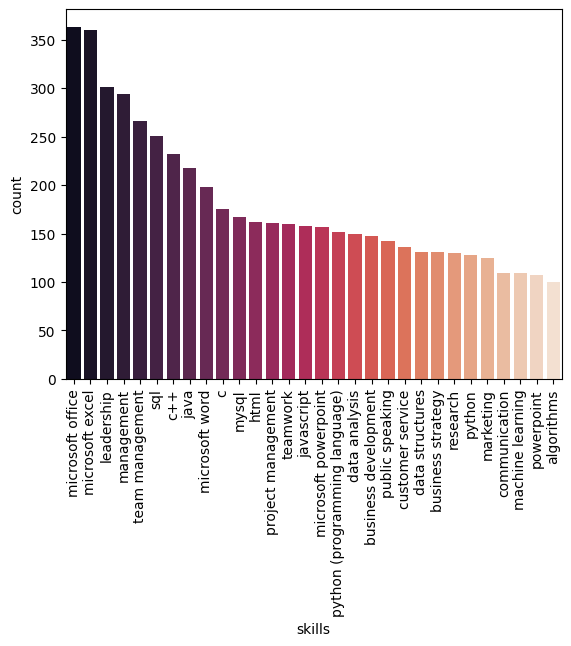

In [530]:
sns.barplot(x='skills',y='count', data=j_df, palette='rocket')
plt.xticks(rotation='vertical')
plt.show()

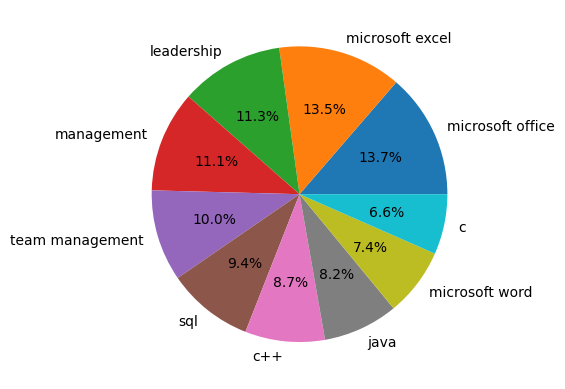

In [531]:
plt.pie(df2.head(10), labels=df1.head(10),autopct='%1.1f%%')
plt.show()

### The analysis and plots tell us that skills for using MS office and MS excel are the most prevalent in the skillset of professionals.

### After that, skills related to leadership and management are prevalent.

### The third most prevalent type of skills are the ones related to programming like sql, c++, java

# Finding how many professionals have java, python and sql in their skillset 

In [532]:
java_df=df[df['skills'].str.contains('java')]
java_df.shape

(292, 2)

In [533]:
python_df=df[df['skills'].str.contains('python')]
python_df.shape

(246, 2)

In [534]:
sql_df=df[df['skills'].str.contains("sql")]
sql_df.shape

(343, 2)

In [535]:
ndf = pd.concat([java_df,python_df,sql_df],axis=1,join='inner')

In [536]:
ndf.columns=['jobs','skill'," "," "," "," "]
ndf=ndf.drop(" ", axis=1)

In [537]:
ndf.shape

(113, 2)

## 113 professionals have python, sql and java in their skillset

In [538]:
# more analysis
people = []
for msg in ndf['jobs'].tolist():
    for word in msg.split(sep=','):
        people.append(word)

In [539]:
df1 = pd.DataFrame(Counter(people).most_common(30))[0]

In [540]:
df2 = pd.DataFrame(Counter(people).most_common(30))[1]

In [541]:
j_df = pd.concat([df1,df2], axis=1, join='inner')
j_df.columns = ['jobs','count']

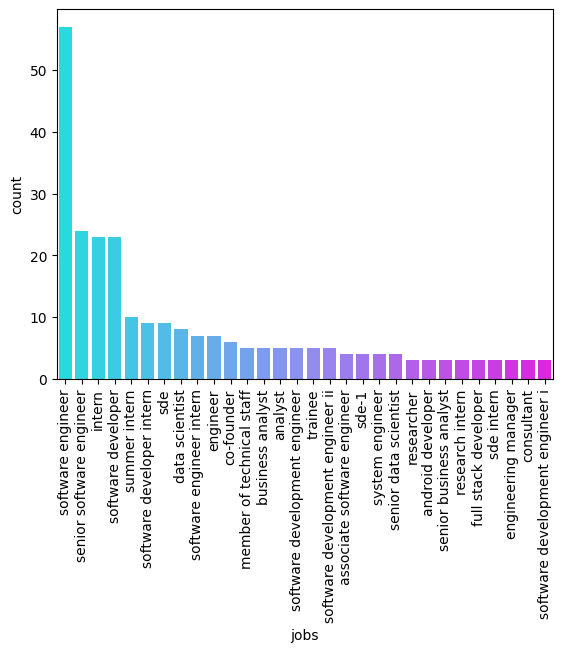

In [545]:
sns.barplot(x='jobs',y='count', data= j_df, palette='cool')
plt.xticks(rotation='vertical')
plt.show()

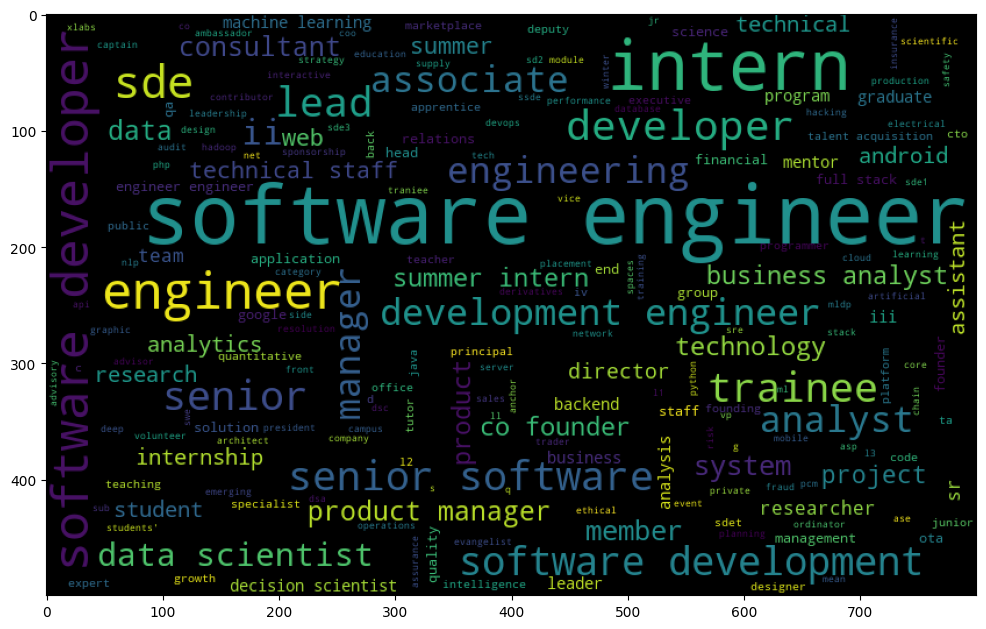

In [543]:
mainskill_wc = WordCloud(width=800,height=500,background_color='black', min_font_size=5).generate(ndf['jobs'].str.cat(sep=","))
plt.figure(figsize=(12,8))
plt.imshow(mainskill_wc)

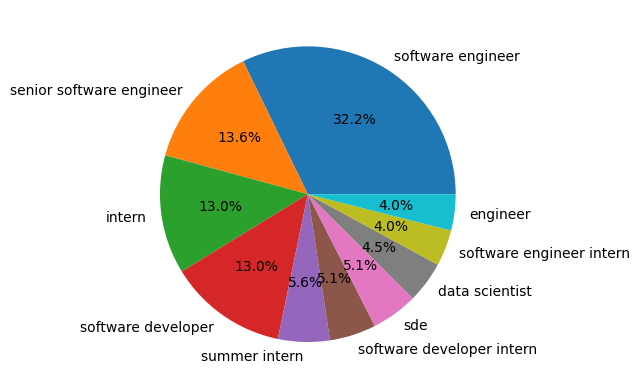

In [544]:
plt.pie(df2.head(10), labels=df1.head(10),autopct='%1.1f%%')
plt.show()


### From the pie chart, we can conclude that out of all the professionals who have java, python and sql in their skill set, the majority of people are software engineers. 

# Final Report

### 1. Java, C++, JavaScript, Sql, Data Structures are the most popular skills required for the role of a software developer/software engineer.

### 2. The job title "Software Engineer" requires Python as the highly sought after skill.

### 3. The most popular skills for a professional who knows "react.js" are javascript, html, css, c++, git, mongodb, node.js. 

### 4. a)  Job titles related to IT sector are most abundant followed by job titles containing the word "manager".

### b) Skills for using MS office and MS excel are the most prevalent in the skillset of professionals.

### c) Most of the tech related job titles require python as a highly sought after skill as python is a very popular language in the tech world and even in the field of analysis.

### d) The number of professionals who have sql as their skill is more than the number of professionals having c++ or java as their skill.

### e) We can find details about professionals who have some particular set of skills in their skill set. It was found that software engineers have all the three skills - java, python and sql in their skillset. 

### We can perform such data analysis to answer numerous questions. 